In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from PIL import Image
import tensorflow as tf
from pathlib import Path

In [27]:
x_train = []
y_train = []

basepath = Path(r'C:\Users\admin\Downloads\VOC2005_1\PNGImages\Caltech_cars')
files_in_basepath = basepath.iterdir()
for item in files_in_basepath:
    if item.is_file():
        img = Image.open(item)
        img = img.resize((128,128))
        data = np.array(img)
        x_train.append(data)
        y_train.append(0)

basepath = Path(r'C:\Users\admin\Downloads\VOC2005_1\PNGImages\Caltech_motorbikes_side')
files_in_basepath = basepath.iterdir()
for item in files_in_basepath:
    if item.is_file():
        img = Image.open(item)
        img = img.resize((128,128))
        data = np.array(img)
        x_train.append(data)
        y_train.append(1)
        
basepath = Path(r'C:\Users\admin\Downloads\VOC2005_1\PNGImages\ETHZ_motorbike-testset')
files_in_basepath = basepath.iterdir()
for item in files_in_basepath:
    if item.is_file():
        img = Image.open(item)
        img = img.resize((128,128))
        data = np.array(img)
        x_train.append(data)
        y_train.append(1)
        
basepath = Path(r'C:\Users\admin\Downloads\VOC2005_1\PNGImages\ETHZ_sideviews-cars')
files_in_basepath = basepath.iterdir()
for item in files_in_basepath:
    if item.is_file():
        img = Image.open(item)
        img = img.resize((128,128))
        data = np.array(img)
        x_train.append(data)
        y_train.append(0)
        
basepath = Path(r'C:\Users\admin\Downloads\VOC2005_1\PNGImages\TUGraz_bike')
files_in_basepath = basepath.iterdir()
for item in files_in_basepath:
    if item.is_file():
        img = Image.open(item)
        img = img.resize((128,128))
        data = np.array(img)
        x_train.append(data)
        y_train.append(1)
        
basepath = Path(r'C:\Users\admin\Downloads\VOC2005_1\PNGImages\TUGraz_cars')
files_in_basepath = basepath.iterdir()
for item in files_in_basepath:
    if item.is_file():
        img = Image.open(item)
        img = img.resize((128,128))
        data = np.array(img)
        x_train.append(data)
        y_train.append(0)

In [28]:
from sklearn.model_selection import train_test_split
trainX, valX, trainY, valY = train_test_split(x_train, y_train, test_size=0.1, random_state=1) # creating training and validation sets (validation set of smaller proportion than usual since the dataset is small)

In [29]:
trainX = np.array(trainX)
valX = np.array(valX)
trainY = np.array(trainY)
valY = np.array(valY)
trainX = trainX/255
valX = valX/255
print(np.shape(trainX))
print(np.shape(valX))
print(np.shape(trainY))
print(np.shape(valY))

(892, 128, 128, 3)
(100, 128, 128, 3)
(892,)
(100,)


In [30]:
from sklearn.utils import shuffle
trainX, trainY = shuffle(trainX, trainY, random_state = 100)
valX, valY = shuffle(valX, valY, random_state = 100)

In [31]:
model = tf.keras.Sequential([
tf.keras.applications.resnet50.ResNet50(include_top = False, weights = 'imagenet', pooling = 'avg', input_shape= (128,128,3)),
tf.keras.layers.Dropout(0.2),
tf.keras.layers.Dense(1, activation = 'sigmoid')])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [33]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate = 0.000001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [34]:
history = model.fit(x = trainX,y = trainY, batch_size = 16, epochs=10,verbose=1, validation_data = (valX,valY))

Epoch 1/10
56/56 [==============================] - 334s 5s/step - loss: 0.0000e+00 - accuracy: 0.6221 - val_loss: 0.0000e+00 - val_accuracy: 0.7300
Epoch 2/10
56/56 [==============================] - 345s 6s/step - loss: 0.0000e+00 - accuracy: 0.6717 - val_loss: 0.0000e+00 - val_accuracy: 0.6700
Epoch 3/10
56/56 [==============================] - 328s 6s/step - loss: 0.0000e+00 - accuracy: 0.7060 - val_loss: 0.0000e+00 - val_accuracy: 0.6700
Epoch 4/10
56/56 [==============================] - 357s 6s/step - loss: 0.0000e+00 - accuracy: 0.7672 - val_loss: 0.0000e+00 - val_accuracy: 0.6700
Epoch 5/10
56/56 [==============================] - 365s 7s/step - loss: 0.0000e+00 - accuracy: 0.8133 - val_loss: 0.0000e+00 - val_accuracy: 0.6700
Epoch 6/10
56/56 [==============================] - 287s 5s/step - loss: 0.0000e+00 - accuracy: 0.8437 - val_loss: 0.0000e+00 - val_accuracy: 0.6600
Epoch 7/10
56/56 [==============================] - 256s 5s/step - loss: 0.0000e+00 - accuracy: 0.8685 - v

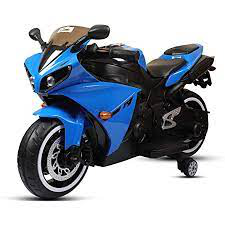

It is a bike


In [37]:
image = Image.open(r'C:\Users\admin\Downloads\img3.jpg')
display(image)
image = image.resize((128,128))
image = np.array(image)
image = image/255
images_list = []
images_list.append(image)
x = np.asarray(images_list)
ans = model.predict(x)
if (ans == 0):
    print("It is a car")
else:
    print("It is a bike")